In [9]:
# ===================================
# !!! SET UP PATH AND MERGE FILES !!!
# ===================================

import csv
import numpy as np
import pandas as pd


path = '/home/ambra/Desktop/cluster-morgana/run0406_1000x_190523/run0406/run0406_ID000126/csv/'

texp = [1,5,10,100]
sigma = [5]
chunk = [i+1 for i in range(5)]

#csvName[texp][chunk]
csvName = [[]*i for i in range(len(texp))]
for i in range(len(chunk)) :  
    for j in range(len(texp)) :
        csvName[j].append('run0406_v07_%ds_chunk%02d.csv' % (texp[j], chunk[i]))
        
# merge files ---!
csvMerged= []
for j in range(len(texp)) :
    csvMerged.append('run0406_1000x_%ds.csv' % texp[j])

    fout = open(path+csvMerged[j],'w+')
    # first file ---!
    for line in open(path+csvName[j][0]):
        fout.write(line)
    # remaining files ---!    
    for i in range(len(chunk)-1):
        f = open(path+csvName[j][i+1])
        next(f) # skip the header ---!
        for line in f:
             fout.write(line)
        f.close() 
    fout.close()
    
print(csvMerged)

['run0406_1000x_1s.csv', 'run0406_1000x_5s.csv', 'run0406_1000x_10s.csv', 'run0406_1000x_100s.csv']


In [10]:
# ==================
# !!! STATISTICS !!!
# ==================

from scipy import stats

tsv_mean, tsv_median, tsv_var, tsv_std = [], [], [], []
raDet_mean, raDet_median, raDet_var, raDet_std = [], [], [], []
decDet_mean, decDet_median, decDet_var, decDet_std = [], [], [], []
raFit_mean, raFit_median, raFit_var, raFit_std = [], [], [], []
decFit_mean, decFit_median, decFit_var, decFit_std = [], [], [], []

quantities = ['TSV', 'detected RA', 'detected DEC', 'fitted RA', 'fitted DEC']
stats = ['MEAN', 'MEDIAN', 'VAR', 'STD']

means = [tsv_mean, raDet_mean, decDet_mean, raFit_mean, decFit_mean]
medians = [tsv_median, raDet_median, decDet_median, raFit_median, decFit_median]
var = [tsv_var, raDet_var, decDet_var, raFit_var, decFit_var]
std = [tsv_std, raDet_std, decDet_std, raFit_std, decFit_std]

stats_val = [means, medians, var, std]

for n in range(4) :  
    filename = csvMerged[n]
    # load DataFrame and column names ---!
    df = pd.read_csv(path+filename)
    cols = list(df.columns)

    # set arrays ---!
    trial = np.array(df[cols[0]])
    #texp = np.array(df[cols[1]])
    #sigma = np.array(df[cols[2]])
    Ndet = np.array(df[cols[3]])
    Nsrc = np.array(df[cols[4]])
    raSrc001 = np.array(df[cols[5]])
    decSrc001 = np.array(df[cols[6]])
    raFit = np.array(df[cols[7]])
    decFit = np.array(df[cols[8]])
    raFit_err = (np.array(df[cols[9]]))
    decFit_err = np.array(df[cols[10]])
    mean_err = np.array(df[cols[11]])
    tsv = np.array(df[cols[12]])
    
    # TSV stats ---!
    tsv_mean.append(np.nanmean(tsv))
    tsv_median.append(np.nanmedian(tsv))
    tsv_var.append(np.nanvar(tsv))
    tsv_std.append(np.nanstd(tsv))
    
    # detect RA & DEC stats ---!
    raDet_mean.append(np.nanmean(raSrc001))
    raDet_median.append(np.nanmedian(raSrc001))
    raDet_var.append(np.nanvar(raSrc001))
    raDet_std.append(np.nanstd(raSrc001))
    decDet_mean.append(np.nanmean(decSrc001))
    decDet_median.append(np.nanmedian(decSrc001))
    decDet_var.append(np.nanvar(decSrc001))
    decDet_std.append(np.nanstd(decSrc001))
    
    # fit RA & DEC stats ---!
    raFit_mean.append(np.nanmean(raFit))
    raFit_median.append(np.nanmedian(raFit))
    raFit_var.append(np.nanvar(raFit))
    raFit_std.append(np.nanstd(raFit))
    decFit_mean.append(np.nanmean(decFit))
    decFit_median.append(np.nanmedian(decFit))
    decFit_var.append(np.nanvar(decFit))
    decFit_std.append(np.nanstd(decFit))

    
    
for i in range(len(quantities)) :
    for j in range(len(stats)) :
        print(quantities[i], stats[j], '[1,5,10,100]s =', np.round(stats_val[j][i],4))
        
    print('\n============\n')


TSV MEAN [1,5,10,100]s = [  34.2598  143.0679  281.2186 2501.2037]
TSV MEDIAN [1,5,10,100]s = [  32.707   140.952   279.2605 2493.4275]
TSV VAR [1,5,10,100]s = [  317.2788  1225.7202  2793.0324 35185.3436]
TSV STD [1,5,10,100]s = [ 17.8123  35.0103  52.8491 187.5776]


detected RA MEAN [1,5,10,100]s = [32.8003 33.0571 33.0575 33.0561]
detected RA MEDIAN [1,5,10,100]s = [33.0542 33.0549 33.0549 33.0542]
detected RA VAR [1,5,10,100]s = [9.121e-01 8.000e-04 5.000e-04 1.000e-04]
detected RA STD [1,5,10,100]s = [0.9551 0.0281 0.0232 0.0105]


detected DEC MEAN [1,5,10,100]s = [-51.9973 -51.8409 -51.8412 -51.8403]
detected DEC MEDIAN [1,5,10,100]s = [-51.8508 -51.832  -51.832  -51.8316]
detected DEC VAR [1,5,10,100]s = [3.243e-01 3.000e-04 2.000e-04 1.000e-04]
detected DEC STD [1,5,10,100]s = [0.5694 0.0172 0.014  0.01  ]


fitted RA MEAN [1,5,10,100]s = [-3.81478582e+04  3.30567000e+01  3.30566000e+01  3.30568000e+01]
fitted RA MEDIAN [1,5,10,100]s = [33.0561 33.057  33.0566 33.0566]
fitted

[ 1.5318e+01  3.6701e+01  3.2749e+01  4.4706e+01  3.3309e+01 -2.6000e-02
  3.1345e+01  4.0438e+01  5.4931e+01  1.7468e+01]


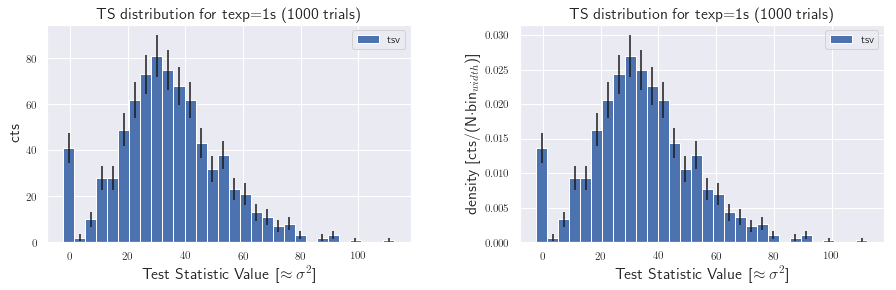

[106.926 170.226 164.445 185.157 114.649 117.165 151.683 203.612 132.671
 140.074]


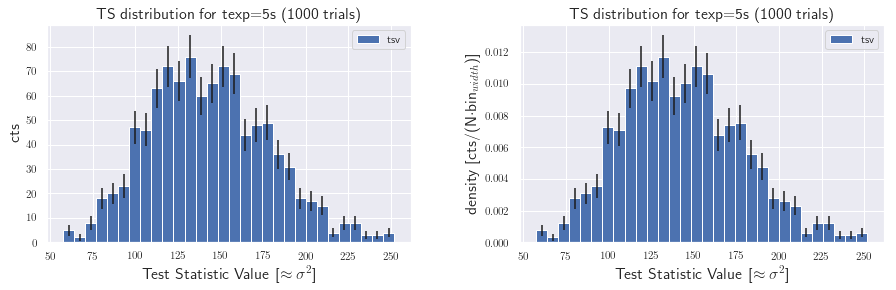

[220.071 368.957 284.607 317.567 234.99  214.726 327.418 391.992 354.607
 283.234]


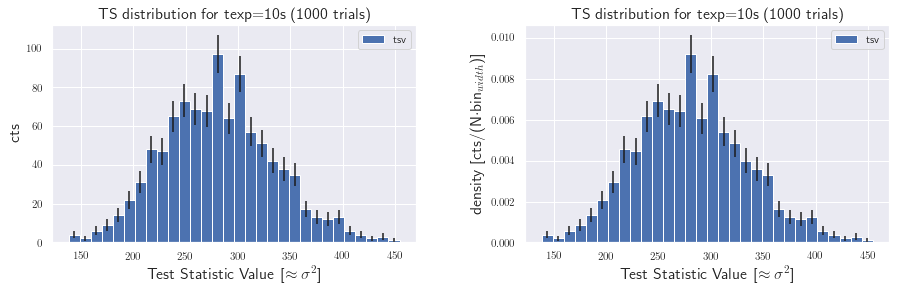

[2323.906 2942.098 2409.638 2681.62  2173.691 2246.626 2783.471 2668.874
 2365.71  2298.877]


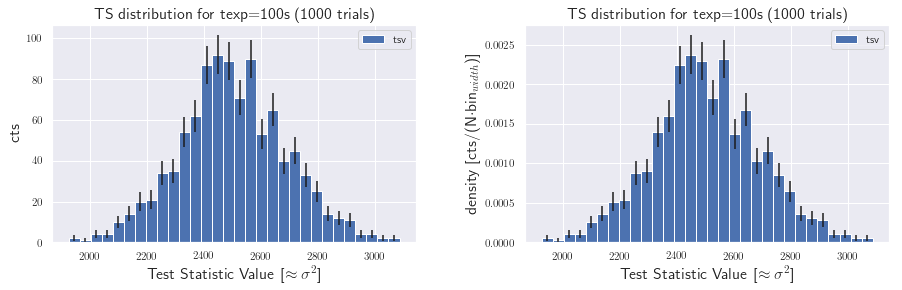

In [112]:
# =======================
# !!! TEST HISTOGRAMS !!!
# =======================


for n in range(4) :  
    tsv = []

    filename = csvMerged[n]
    # load DataFrame and column names ---!
    df = pd.read_csv(path+filename)
    cols = list(df.columns)
    df = df.dropna()
    tsv = np.array(df[cols[12]])

    print(tsv[:10])

    
    fig_tsv = plt.figure(figsize=(15, 10))
    plt.rc('text', usetex=True)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.set()
    
    
    ax_tsv1 = plt.subplot(221)
    
    height, binEdges = np.histogram(tsv, bins=30, density=False)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    width = (tsv.max()-tsv.min())/30
    error = np.sqrt(height)
    
    plt.bar(bincenters, height, width=width, color='b', yerr=error, label='tsv')
    plt.xlabel('Test Statistic Value [$\\approx \\sigma^2$]', fontsize=16)
    plt.ylabel('cts', fontsize=16)
    plt.title('TS distribution for texp=%ds (1000 trials)' %texp[n], fontsize=16)
    plt.legend(loc=0)

    
    
    ax_tsv2 = plt.subplot(222)
    
    height_norm, binEdges = np.histogram(tsv, bins=30, density=True)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    width = (tsv.max()-tsv.min())/30
    error_norm = np.sqrt(height)/(len(tsv)*width)

    plt.bar(bincenters, height_norm, width=width, color='b', yerr=error_norm, label='tsv')
    plt.xlabel('Test Statistic Value [$\\approx \\sigma^2$]', fontsize=16)
    plt.ylabel('density [cts/(N$\\cdot$bin$_{width}$)]', fontsize=16)
    plt.title('TS distribution for texp=%ds (1000 trials)' %texp[n], fontsize=16)
    plt.legend(loc=0)
    
    # savefig ---!
    figname = '_tsv_errors'
    extent = ax_tsv2.get_window_extent().transformed(fig_tsv.dpi_scale_trans.inverted())
    fig_tsv.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.3, 1.3))


    
    
    plt.show()

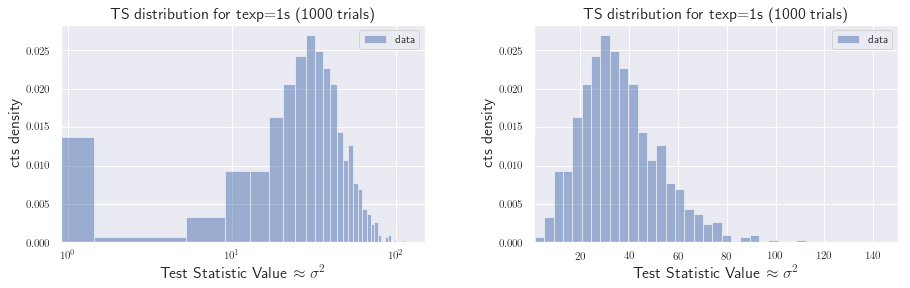

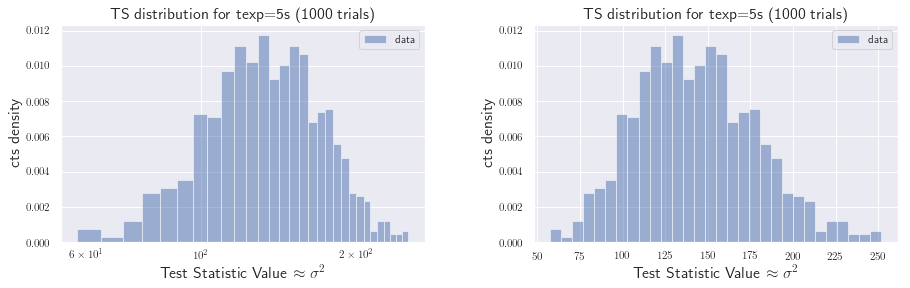

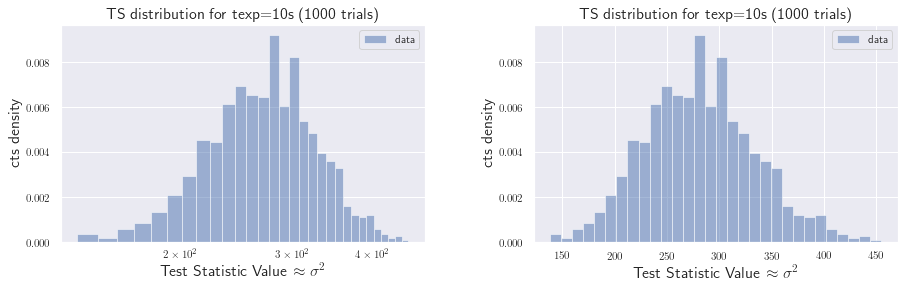

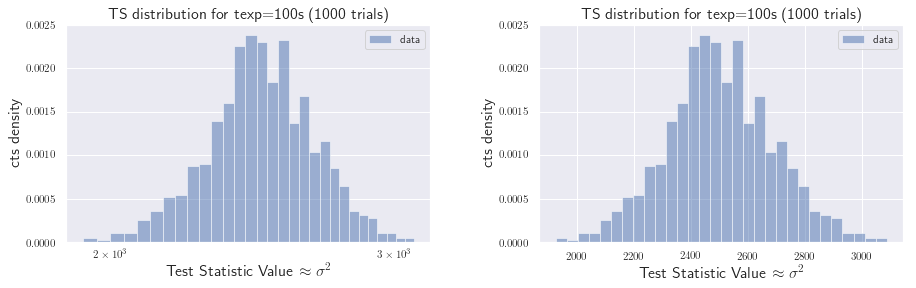

done


In [4]:
# =================
# !!! TSV PLOTS !!!
# =================

import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm


for n in range(4) :
    
    # ============
    # !!! DATA !!!
    # ============
    
    filename = csvMerged[n]
    # load DataFrame and column names ---!
    df = pd.read_csv(path+filename)
    cols = list(df.columns)
    
    # drop all cols with NaN ---!
    df = df.dropna()
    
    # set arrays ---!
    tsv = np.array(df[cols[12]])
    

    # ============
    # !!! PLOT !!!
    # ============

    # set up figure and axes ---!
    fig1 = plt.figure(figsize=(15, 10))
    plt.rc('text', usetex=True)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.set()

    # ========================
    # 1) TSV HISTOGRAM SNS !!!
    # ========================
    
    ax1 = plt.subplot(221, xscale='log')
#    plt.hist(tsv, bins= 30, alpha=0.5, label='data', density=True) # 10 bins by default ---!
    sns.barplot()

#    plt.axvline(tsv_mean[n], label='mean $\\approx$ %d' %tsv_mean[n], color='r')
#    plt.axvline(tsv_median[n], label='median $\\approx$ %d' %tsv_median[n], color='g')
    
    plt.xlim([9e-1, 150]) if n == 0 else None
    plt.xlabel('Test Statistic Value $\\approx\sigma^2$', fontsize=16)
    plt.ylabel('cts density', fontsize=16)
    plt.title('TS distribution for texp=%ds (1000 trials)' %texp[n], fontsize=16)
    plt.legend(loc=0)

    # save only subplot with padding
    figname = '_ts_histLog'
    extent = ax1.get_window_extent().transformed(fig1.dpi_scale_trans.inverted())
    fig1.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.3, 1.3))

   
    # ========================
    # 2) TSV HISTOGRAM SNS !!!
    # ========================
    
    ax2 = plt.subplot(222)
#    plt.hist(tsv, bins=30, alpha=0.5, label='data', density=True)

#    plt.axvline(tsv_mean[n], label='mean $\\approx$ %d' %tsv_mean[n], color='r')
#    plt.axvline(tsv_median[n], label='median $\\approx$ %d' %tsv_median[n], color='g')
    
    plt.xlim([9e-1, 150]) if n == 0 else None
    plt.xlabel('Test Statistic Value $\\approx\sigma^2$', fontsize=16)
    plt.ylabel('cts density', fontsize=16)
    plt.title('TS distribution for texp=%ds (1000 trials)' %texp[n], fontsize=16)
    plt.legend(loc=0)

    # save only subplot with padding
    figname = '_ts_histLin'
    extent = ax2.get_window_extent().transformed(fig1.dpi_scale_trans.inverted())
    fig1.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.3, 1.3))

   
  

    plt.show()
print('done')

DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 69.39999999999999
DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
done


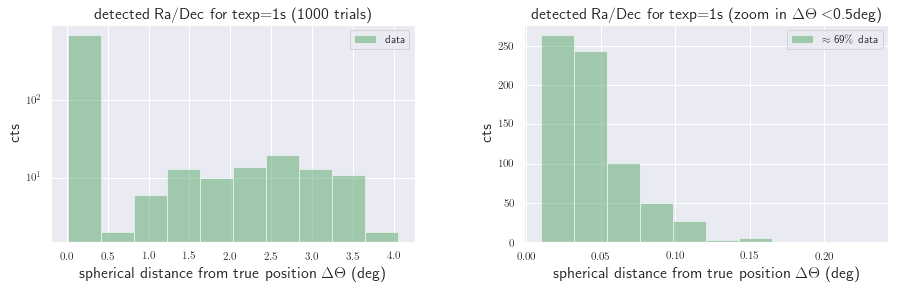

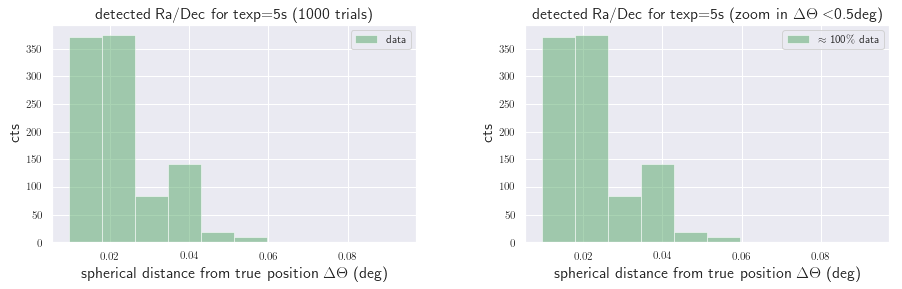

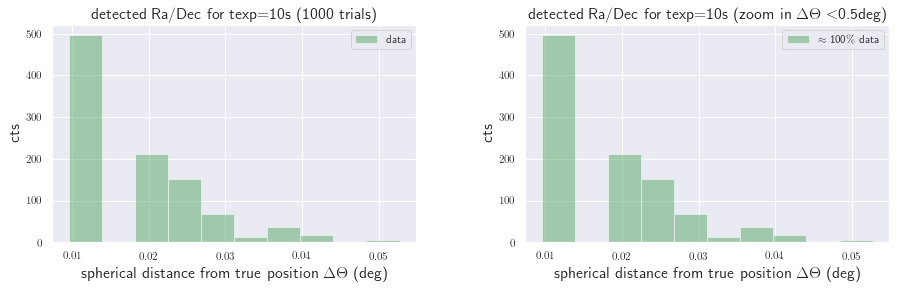

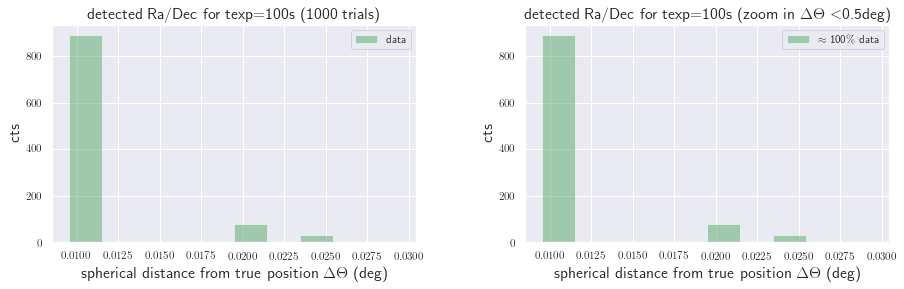

In [10]:
# ===============================
# !!! DETECTED RA & DEC PLOTS !!!
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from astropy import units as u
from astropy.coordinates import SkyCoord


d_mean = []
d_median = []
d_var = []
d_std = []


for n in range(4) :
    
    # ============
    # !!! DATA !!!
    # ============
    
    filename = csvMerged[n]
    # load DataFrame and column names ---!
    df = pd.read_csv(path+filename)
    cols = list(df.columns)
    trials = len(df[cols[0]])

    # drop all cols with NaN ---!
    df = df.dropna()
    
    # set arrays ---!
    raSrc001 = np.array(df[cols[5]])
    decSrc001 = np.array(df[cols[6]])
    trueRA = 33.057
    trueDEC = -51.841
    
    distance = []
    d = []

    # spherical distance (great circle not small angle approx) ---!
    # Angle(10.2345 * u.deg)
    true_coord = SkyCoord(ra = trueRA*u.deg, dec = trueDEC*u.deg, frame='fk5')
    
    for i in range(len(raSrc001)) :
        detect_coord = SkyCoord(ra = raSrc001[i]*u.deg, dec = decSrc001[i]*u.deg, frame='fk5')
        distance.append(float(true_coord.separation(detect_coord).deg))      
     
    for i in range(len(distance)) :
        if distance[i] < 0.5 :
            d.append(distance[i])

    perc = 100 * (len(d)/trials)
    print('DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION:', perc)
        
    d_mean.append(np.nanmean(d))
    d_median.append(np.nanmedian(d))
    d_var.append(np.nanvar(d))
    d_std.append(np.nanstd(d))
    
    
    # ============
    # !!! PLOT !!!
    # ============

    # set up figure and axes ---!
    fig2 = plt.figure(figsize=(15, 10))
    plt.rc('text', usetex=True)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.set()

    # =================================
    # 5) DET RA & DEC HISTOGRAM SNS !!!
    # =================================
    if n == 0 :
        ax5 = plt.subplot(221, yscale='log')
    else :
        ax5 = plt.subplot(221)
    
    plt.hist(distance, alpha=0.5, color='g', label='data')
#    plt.axvline(distance_mean[n], label='mean $\\approx$ %d' %distance_mean[n], color='r')
#    plt.axvline(distance_median[n], label='median $\\approx$ %d' %distance_median[n], color='g')
    
    
    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('cts', fontsize=16)
    plt.title('detected Ra/Dec for texp=%ds (1000 trials)' %texp[n], fontsize=16)
    plt.legend(loc=0)

    # save only subplot with padding
    figname = '_detSphDist_histAll'
    extent = ax5.get_window_extent().transformed(fig2.dpi_scale_trans.inverted())
    fig2.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.3, 1.3))

    # =================================
    # 6) DET RA & DEC HISTOGRAM SNS !!!
    # =================================
    
    ax6 = plt.subplot(222)
    plt.hist(d, alpha=0.5, color='g',
             label='$\\approx$ %d'%perc+'$\%$ data')
#    plt.axvline(d[n], label='mean $\\approx$ %d' %d_mean[n], color='r')
#    plt.axvline(d_median[n], label='median $\\approx$ %d' %d_median[n], color='g')
    
    
    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('cts', fontsize=16)
    plt.title('detected Ra/Dec for texp=%ds (zoom in $\Delta\\Theta<$0.5deg)' %texp[n], fontsize=16)
    plt.legend(loc=0)

    # save only subplot with padding
    figname = '_detSphDist_histNear'
    extent = ax6.get_window_extent().transformed(fig2.dpi_scale_trans.inverted())
    fig2.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.3, 1.3))

 

    #plt.show()
    
print('done')

FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 69.39999999999999
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
done


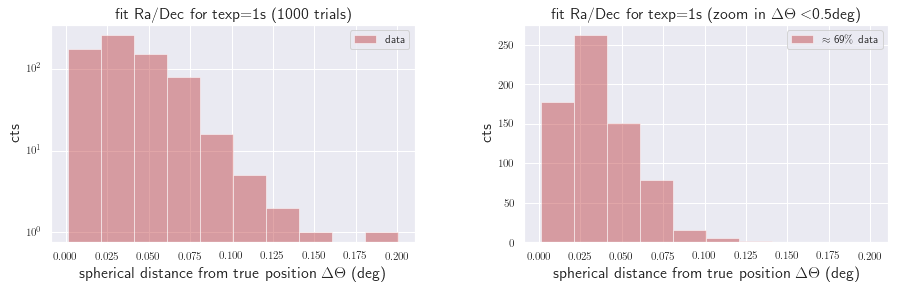

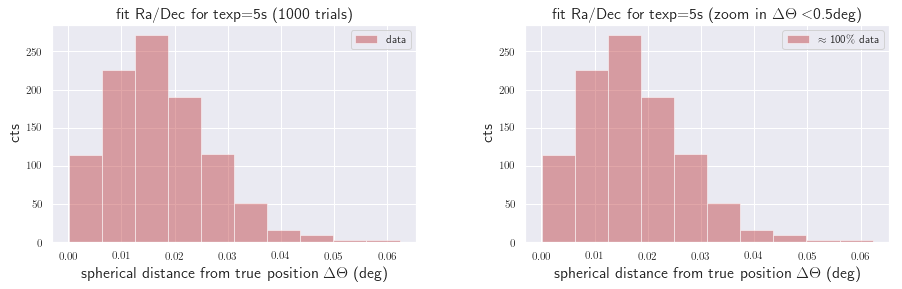

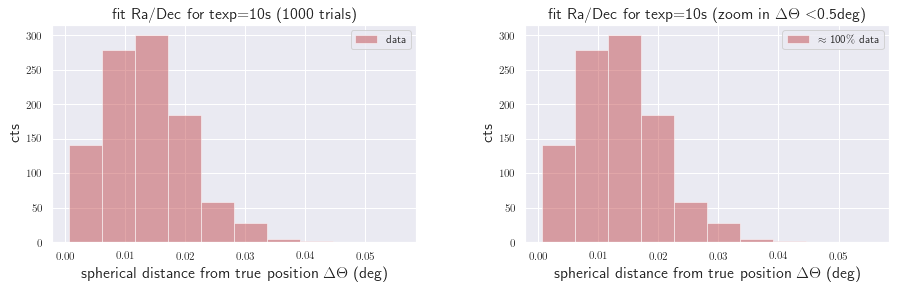

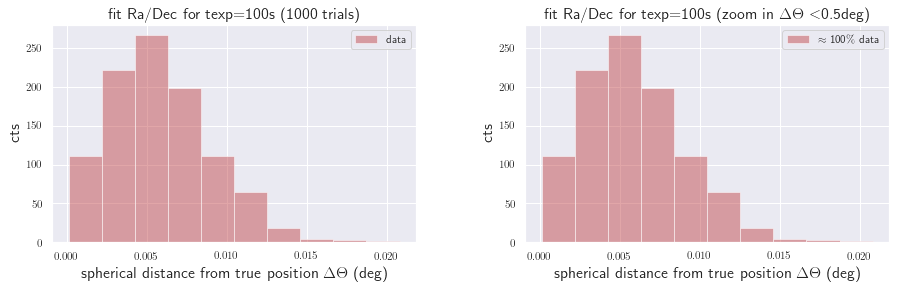

In [12]:
# ===============================
# !!! FIT RA & DEC PLOTS !!!
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from astropy import units as u
from astropy.coordinates import SkyCoord





for n in range(4) :
    
    # ============
    # !!! DATA !!!
    # ============
    
    filename = csvMerged[n]
    # load DataFrame and column names ---!
    df = pd.read_csv(path+filename)
    cols = list(df.columns)
    
    trials = len(df[cols[0]])
    # drop all cols with NaN ---!
    df = df.dropna()
    
    # set arrays ---!
    raFit = np.array(df[cols[7]])
    decFit = np.array(df[cols[8]])
    ra_err = np.array(df[cols[9]])
    dec_err = np.array(df[cols[10]])
    trueRA = 33.057
    trueDEC = -51.841
    
    distance = []
    d = []


    # spherical distance (great circle not small angle approx) ---!
    # Angle(10.2345 * u.deg)
    true_coord = SkyCoord(ra = trueRA*u.deg, dec = trueDEC*u.deg, frame='fk5')
    for i in range(len(raFit)) :
        if decFit[i] >= -90 and decFit[i] <= 90 and 0 <= raFit[i] <= 360 :
            fit_coord = SkyCoord(ra = raFit[i]*u.deg, dec = decFit[i]*u.deg, frame='fk5')
            distance.append(float(true_coord.separation(fit_coord).deg))                  
    
    for i in range(len(distance)) :
        if distance[i] < 0.5 :
            d.append(distance[i])
        
    perc = len(d)/trials *100
    print('FIT RATIO WITHIN 0.5deg FROM TRUE POSITION:', perc)
        
    d_mean.append(np.nanmean(d))
    d_median.append(np.nanmedian(d))
    d_var.append(np.nanvar(d))
    d_std.append(np.nanstd(d))
    
    
    # ============
    # !!! PLOT !!!
    # ============

    # set up figure and axes ---!
    fig3 = plt.figure(figsize=(15, 10))
    plt.rc('text', usetex=True)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.set()

    # =================================
    # 9) FIT RA & DEC HISTOGRAM SNS !!!
    # =================================
    
    if n == 0 :
        ax9 = plt.subplot(221, yscale='log') 
    else :
        ax9 = plt.subplot(221)
        
    plt.hist(d, alpha=0.5, color='r', label='data')

#    plt.axvline(d_mean[n], label='mean $\\approx$ %d' %d_mean[n], color='r')
#    plt.axvline(d_median[n], label='median $\\approx$ %d' %d_median[n], color='g')
    
    
    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('cts', fontsize=16)
    plt.title('fit Ra/Dec for texp=%ds (1000 trials)' %texp[n], fontsize=16)
    plt.legend(loc=0)

    # save only subplot with padding
    figname = '_fitSphDist_histAll'
    extent = ax9.get_window_extent().transformed(fig2.dpi_scale_trans.inverted())
    fig3.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.3, 1.3))

    # ==================================
    # 11) FIT RA & DEC HISTOGRAM SNS !!!
    # =================================
    
    ax11 = plt.subplot(222)
    plt.hist(d, alpha=0.5, color='r', 
             label='$\\approx$ %d'%perc+'$\%$ data')

#    plt.axvline(d_mean[n], label='mean $\\approx$ %d' %d_mean[n], color='r')
#    plt.axvline(d_median[n], label='median $\\approx$ %d' %d_median[n], color='g')    
    
    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('cts', fontsize=16)
    plt.title('fit Ra/Dec for texp=%ds (zoom in $\Delta\\Theta<$0.5deg)' %texp[n], fontsize=16)
    plt.legend(loc=0)

    # save only subplot with padding
    figname = '_fitSphDist_histNear'
    extent = ax11.get_window_extent().transformed(fig2.dpi_scale_trans.inverted())
    fig3.savefig(filename.replace('.csv', figname+'.png'), bbox_inches=extent.expanded(1.3, 1.3))

 

    #plt.show()
    
print('done')
